In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

import random

np.random.seed(1001)
random.seed(1001)

# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 50
memory = [10, 20, 30, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap = 10**(-10), abs_gap = 10**(-10), max_iter=max_iter, memory=m, print_freq=10, minorant_update='agg_lin')
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 10


/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=3610.0413003871913, L=-20000.0, U=-5.5385686111802475, L0=-20000.0
k=10, rel_gap=0.04601808513281746, L=-54.24901035143507, U=-51.862401924481865, L0=-54.9512551556838
k=20, rel_gap=0.00015015443398908447, L=-53.627132704431396, U=-53.6190815615885, L0=-53.627132704431396
rho=8.04526042848532
k=30, rel_gap=4.380598406150912e-06, L=-53.626534015458034, U=-53.62629910017767, L0=-53.78129829061476
k=40, rel_gap=4.38051264478151e-06, L=-53.626534015458034, U=-53.62629910477671, L0=-53.892042705951525
rel_gap=4.3800740706006725e-06, L=-53.626534015458034, U=-53.62629912829572
memory = 20
k=0, rel_gap=3610.0413003871913, L=-20000.0, U=-5.5385686111802475, L0=-20000.0
k=10, rel_gap=0.04601808513281746, L=-54.24901035143507, U=-51.862401924481865, L0=-54.24901035144685
k=20, rel_gap=5.072173714500203e-05, L=-53.626299066112104, U=-53.62357918502391, L0=-59.70088008654007
rho=16.137846511852082
rel_gap=-2.3083182203078363e-10, L=-53.626299066112104, U=-53.62629907849076
memory = 30

# Centralized solution

In [5]:
h_cvx = ob.cvx_multi_commodity_flow(params=params)[2]

In [6]:
h_cvx, prob.upper_bnd[-1]

(-53.62629906634274, -53.62629909150468)

# Plot

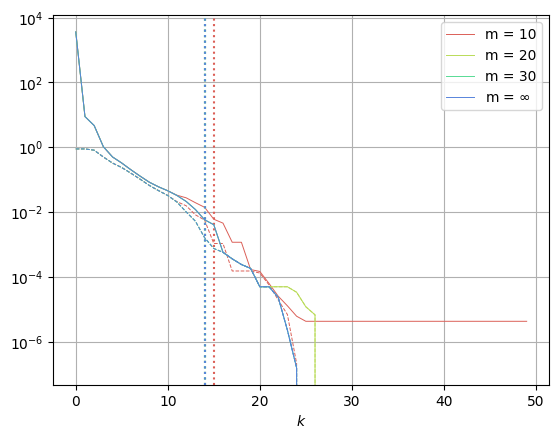

In [31]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx, filename='mc_fin_memory_agg.pdf')